# Phase 3: Feature Engineering (3-4 Days)

# 3.1 Log Transformation:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
df=pd.read_csv('C:\\dataaa\\Mumbai House Prices new.csv')
df['LogPrice'] = np.log(df['PRICE in L'])
df.drop("price",axis=1,inplace=True)
df.drop("price_unit",axis=1,inplace=True)
df

,bhk,type,locality,area,region,status,age,PRICE in L,LogPrice
0,3,Apartment,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00,5.521461
1,2,Apartment,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51,3.961004
2,2,Apartment,Romell Serene,610,Borivali West,Under Construction,New,173.00,5.153292
3,2,Apartment,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,4.094011
4,2,Apartment,Origin Oriana,659,Mira Road East,Under Construction,New,94.11,4.544464
...,...,...,...,...,...,...,...,...,...
76033,3,Apartment,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,700.00,6.551080
76034,5,Apartment,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,1200.00,7.090077
76035,4,Apartment,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,1000.00,6.907755
76036,2,Apartment,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,425.00,6.052089


#  3.2Encoding Categorical Variables
Objective: Convert categorical features into numerical representations for machine learning algorithms, which only accept numerical inputs.

Property Type (5 unique categories: Apartment, Villa, Studio Apartment, Independent House, Penthouse)

One-Hot Encoding is preferred for property types since they don't have a natural ordinal relationship. This encoding won’t result in a large number of features because you only have 5 unique types. Each property will have binary flags indicating whether it’s of a specific type.

In [2]:
df = pd.get_dummies(df, columns=['type'])
df

,bhk,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa
0,3,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False
1,2,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False
2,2,Romell Serene,610,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False
3,2,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False
4,2,Origin Oriana,659,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,3,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False
76034,5,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False
76035,4,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False
76036,2,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False


# 1. Locality (9782 unique values)
With nearly 10,000 unique localities, one-hot encoding would create a high-dimensional dataset, which is inefficient and may lead to overfitting. Instead, you can try:

Target Encoding: Replace each locality with the mean or median PRICE in L for that locality.

In [3]:
locality_price = df.groupby('locality')['PRICE in L'].mean()
df['locality_encoded'] = df['locality'].map(locality_price)
df

,bhk,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_encoded
0,3,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,130.500000
1,2,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,42.852500
2,2,Romell Serene,610,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,207.461538
3,2,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,59.980000
4,2,Origin Oriana,659,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,92.480833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,3,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,657.777778
76034,5,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,657.777778
76035,4,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,1463.888889
76036,2,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,425.000000


# 2.Status (Ready to Move / Under Construction)
Since status has only two values, a binary encoding will work efficiently:
Assign 0 for Under Construction and 1 for Ready to Move.

In [4]:
df['status_encoded'] = df['status'].apply(lambda x: 1 if x == 'Ready to move' else 0)
df

,bhk,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_encoded,status_encoded
0,3,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,130.500000,1
1,2,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,42.852500,0
2,2,Romell Serene,610,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,207.461538,0
3,2,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,59.980000,0
4,2,Origin Oriana,659,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,92.480833,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,3,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,657.777778,1
76034,5,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,657.777778,1
76035,4,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,1463.888889,1
76036,2,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,425.000000,1


# 3. Handling High Dimensionality in Locality and Region
When handling high dimensionality in locality, you can cluster localities based on some characteristics such as average price or geographical proximity.

Clustering Localities by Price
Here’s how you can cluster localities based on the average property price using KMeans clustering:


In [5]:
from sklearn.cluster import KMeans

# Group by locality and calculate the average price
locality_avg_price = df.groupby('locality')['PRICE in L'].mean().reset_index()

# Apply KMeans clustering to localities based on price with a fixed random state
kmeans = KMeans(n_clusters=5, random_state=42)  # Setting a random state for consistency
locality_avg_price['locality_cluster'] = kmeans.fit_predict(locality_avg_price[['PRICE in L']])

# Map clusters back to the original dataframe
df = df.merge(locality_avg_price[['locality', 'locality_cluster']], on='locality', how='left')
df

,bhk,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_encoded,status_encoded,locality_cluster
0,3,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,130.500000,1,0
1,2,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,42.852500,0,0
2,2,Romell Serene,610,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,207.461538,0,2
3,2,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,59.980000,0,0
4,2,Origin Oriana,659,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,92.480833,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,3,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,657.777778,1,1
76034,5,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,657.777778,1,1
76035,4,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,1463.888889,1,4
76036,2,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,425.000000,1,2


# 4.Sorting Clusters by Average Price
If you want to see the cluster labels in ascending or descending order of price, you can sort the result:

In [6]:
cluster_avg_price = df.groupby('locality_cluster')['PRICE in L'].mean()

sorted_clusters = cluster_avg_price.sort_values()

print("Sorted Average Price per Cluster:")
print(sorted_clusters)


Sorted Average Price per Cluster:
locality_cluster
0      89.410085
2     275.389631
1     722.867525
4    1658.511392
3    3476.315789
Name: PRICE in L, dtype: float64


# 3.3Create New Features
Objective: Generate additional relevant features that could improve model performance by providing more context to the data.

Price per Square Foot: This feature helps normalize the price in relation to the size of the house, which can be more informative than the raw price alone.

In [7]:
df['PricePerSqFt in L'] = df['PRICE in L'] / df['area']
df['area_x_PricePerSqFt'] = df['area'] * df['PricePerSqFt in L']
df

,bhk,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_encoded,status_encoded,locality_cluster,PricePerSqFt in L,area_x_PricePerSqFt
0,3,Lak And Hanware The Residency Tower,685,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,130.500000,1,0,0.364964,250.00
1,2,Radheya Sai Enclave Building No 2,640,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,42.852500,0,0,0.082047,52.51
2,2,Romell Serene,610,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,207.461538,0,2,0.283607,173.00
3,2,Soundlines Codename Urban Rainforest,876,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,59.980000,0,0,0.068470,59.98
4,2,Origin Oriana,659,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,92.480833,0,0,0.142807,94.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,3,Parinee Liva Roca,1527,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,657.777778,1,1,0.458415,700.00
76034,5,Parinee Liva Roca,3049,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,657.777778,1,1,0.393572,1200.00
76035,4,Lodha Seaview,3313,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,1463.888889,1,4,0.301841,1000.00
76036,2,Hubtown Serene,1305,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,425.000000,1,2,0.325670,425.00


# 1. BHK vs. Locality Cluster: Boxplot
A boxplot is useful for visualizing the distribution of BHK values across the different clusters. It can help you see the range, median, and outliers for each cluster.

python

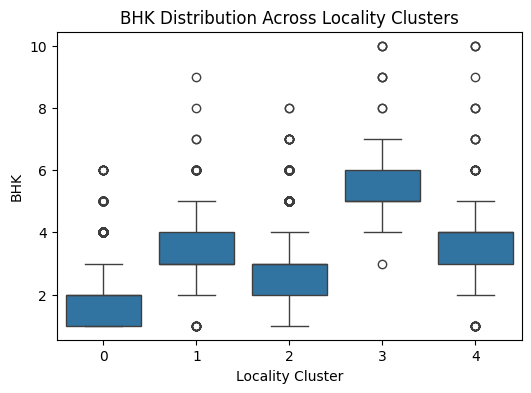

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize the distribution of BHK across clusters
plt.figure(figsize=(6,4))
sns.boxplot(x='locality_cluster', y='bhk', data=df)
plt.title('BHK Distribution Across Locality Clusters')
plt.xlabel('Locality Cluster')
plt.ylabel('BHK')
plt.show()


# 2. Price per Square Foot vs. BHK by Locality Cluster: Scatter Plot
A scatter plot can help visualize the relationship between BHK and Price per Square Foot across different locality clusters.

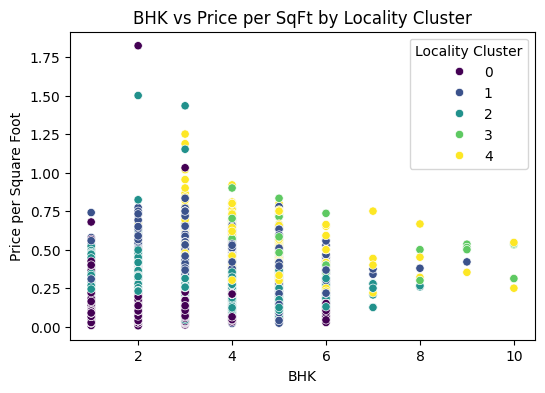

In [9]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='bhk', y='PricePerSqFt in L', hue='locality_cluster', palette='viridis', data=df)
plt.title('BHK vs Price per SqFt by Locality Cluster')
plt.xlabel('BHK')
plt.ylabel('Price per Square Foot')
plt.legend(title='Locality Cluster')
plt.show()

# 3. Average Price per Square Foot per BHK by Cluster: Bar Plot
A bar plot can show the average price per square foot for each BHK in each cluster, giving a good overview of price patterns across different locality clusters.

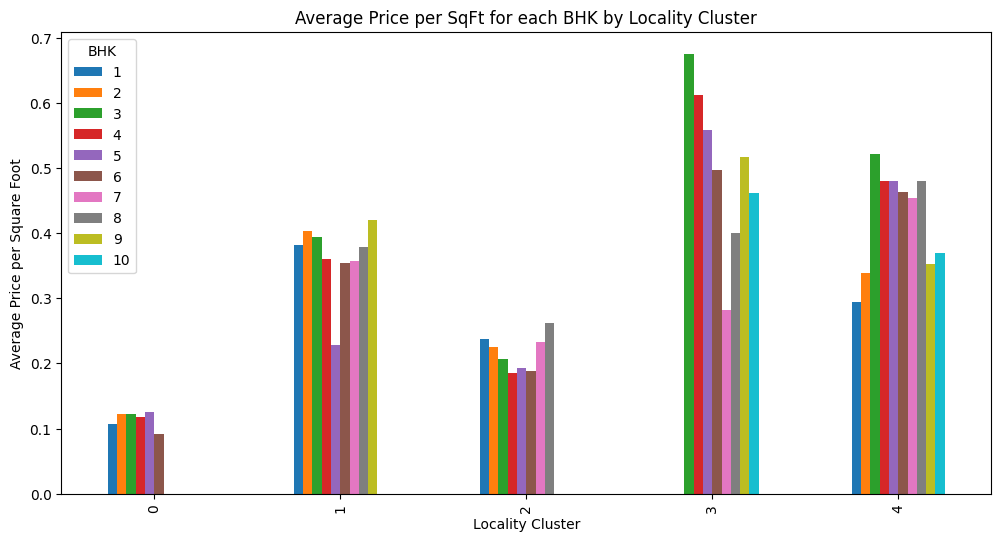

In [10]:
# Group by locality cluster and BHK, then calculate the average price per square foot
bhk_cluster_price = df.groupby(['locality_cluster', 'bhk'])['PricePerSqFt in L'].mean().unstack()

# Create a bar plot for BHK vs. average price per square foot in each cluster
bhk_cluster_price.plot(kind='bar', figsize=(12, 6))
plt.title('Average Price per SqFt for each BHK by Locality Cluster')
plt.xlabel('Locality Cluster')
plt.ylabel('Average Price per Square Foot')
plt.legend(title='BHK')
plt.show()


# 4. Heatmap of Correlation between BHK, Price, and Clusters
A heatmap can help visualize correlations between numerical features like BHK, Price per SqFt, locality_cluster, and other variables.

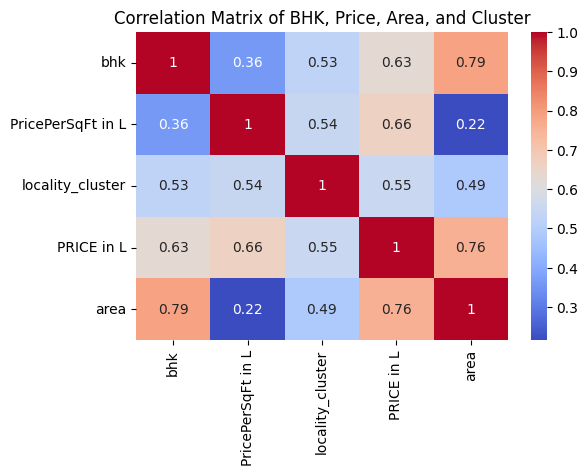

In [11]:
# Select relevant numerical columns for correlation
corr_columns = ['bhk', 'PricePerSqFt in L', 'locality_cluster', 'PRICE in L', 'area']
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of BHK, Price, Area, and Cluster')
plt.show()


# 5. Pairplot: BHK, Area, Price, and Cluster
A pairplot can show pairwise relationships between BHK, Price per SqFt, locality_cluster, and area.

python

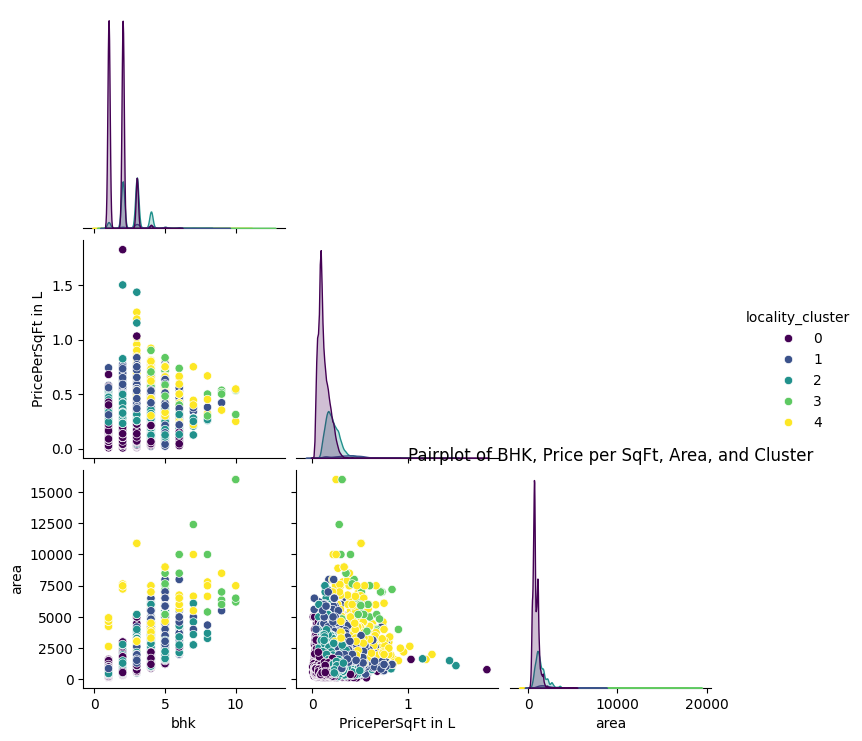

In [12]:
sns.pairplot(df[['bhk', 'PricePerSqFt in L', 'locality_cluster', 'area']], hue='locality_cluster', palette='viridis', corner=True)
plt.title('Pairplot of BHK, Price per SqFt, Area, and Cluster')
plt.show()

# 3.4 Feature Scaling
We will standardize our numerical columns to have a mean of 0 and a standard deviation of 1, which is useful for models sensitive to the scale of data.

Since our data contains columns like 'area' (SquareFeet) and potentially others for which scaling might be relevant, we can apply standardization to the required numerical columns.

In [13]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scaling the numerical features
df[['area']] = scaler.fit_transform(df[['area']])

# If you have other numerical features like HouseAge, you can scale them similarly
# df[['HouseAge']] = scaler.fit_transform(df[['HouseAge']])
df

,bhk,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_encoded,status_encoded,locality_cluster,PricePerSqFt in L,area_x_PricePerSqFt
0,3,Lak And Hanware The Residency Tower,-0.506566,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,130.500000,1,0,0.364964,250.00
1,2,Radheya Sai Enclave Building No 2,-0.573703,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,42.852500,0,0,0.082047,52.51
2,2,Romell Serene,-0.618461,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,207.461538,0,2,0.283607,173.00
3,2,Soundlines Codename Urban Rainforest,-0.221607,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,59.980000,0,0,0.068470,59.98
4,2,Origin Oriana,-0.545356,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,92.480833,0,0,0.142807,94.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,3,Parinee Liva Roca,0.749641,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,657.777778,1,1,0.458415,700.00
76034,5,Parinee Liva Roca,3.020362,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,657.777778,1,1,0.393572,1200.00
76035,4,Lodha Seaview,3.414232,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,1463.888889,1,4,0.301841,1000.00
76036,2,Hubtown Serene,0.418432,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,425.000000,1,2,0.325670,425.00


# 3.5 Feature Selection
To identify the most relevant features, we’ll first use a correlation matrix and then proceed with feature importance from a Random Forest model.

1. Correlation Matrix:
This shows how numerical features are correlated with each other. Strong correlations (positive or negative) could indicate relationships to consider when selecting features.

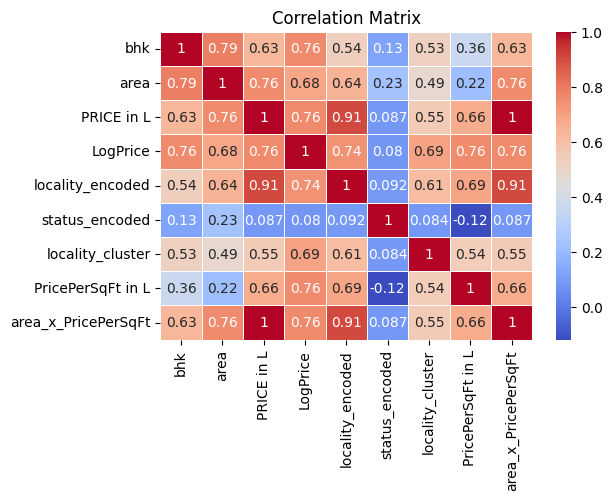

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numerical columns for the correlation matrix
numerical_columns = df.select_dtypes(include=[float, int]).columns
corr_matrix = df[numerical_columns].corr()

# Plotting the heatmap for the correlation matrix
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


# Phase 4 Handling Multicollinearity
Before proceeding with the Random Forest, let’s address the multicollinearity issue:

bhk and area: These are highly correlated (0.79), which suggests they may contain similar information. Depending on domain knowledge, decide which one to drop. If larger area generally means a higher BHK value in your dataset, you might keep area as it directly impacts pricing.

locality_encoded and PRICE in L: These are highly correlated (0.91). Since PRICE in L is what we’re trying to predict, you should keep the target feature but exclude locality_encoded from the final model to avoid leakage (price prediction can’t directly use price-related encodings).

locality_encoded and locality_cluster: These two variables are moderately correlated (0.61). It might be worth experimenting with either variable, but based on the current understanding, clustering of locality could provide more valuable, structured information. You can try keeping locality_cluster and dropping locality_encoded.

2. Refining the Feature Set
Let's refine the feature set based on the correlation matrix and multicollinearity considerations:

Keep area (drop bhk).
Drop locality_encoded (keep locality_cluster).
Keep PricePerSqFt in L.
Keep status_encoded for now (it can be tested for relevance).

In [15]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scaling the numerical features
df[['area']] = scaler.fit_transform(df[['area']])

# If you have other numerical features like HouseAge, you can scale them similarly
# df[['HouseAge']] = scaler.fit_transform(df[['HouseAge']])
df.drop("bhk",axis=1,inplace=True)
df.drop("locality_encoded",axis=1,inplace=True)
df

,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,status_encoded,locality_cluster,PricePerSqFt in L,area_x_PricePerSqFt
0,Lak And Hanware The Residency Tower,-0.506566,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,1,0,0.364964,250.00
1,Radheya Sai Enclave Building No 2,-0.573703,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,0,0,0.082047,52.51
2,Romell Serene,-0.618461,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,0,2,0.283607,173.00
3,Soundlines Codename Urban Rainforest,-0.221607,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,0,0,0.068470,59.98
4,Origin Oriana,-0.545356,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,0,0,0.142807,94.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,Parinee Liva Roca,0.749641,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,1,1,0.458415,700.00
76034,Parinee Liva Roca,3.020362,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,1,1,0.393572,1200.00
76035,Lodha Seaview,3.414232,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,1,4,0.301841,1000.00
76036,Hubtown Serene,0.418432,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,1,2,0.325670,425.00


# 4.2. Random Forest Feature Importance:
Tree-based models like Random Forest are good at giving a sense of feature importance by measuring how much each feature contributes to reducing error.

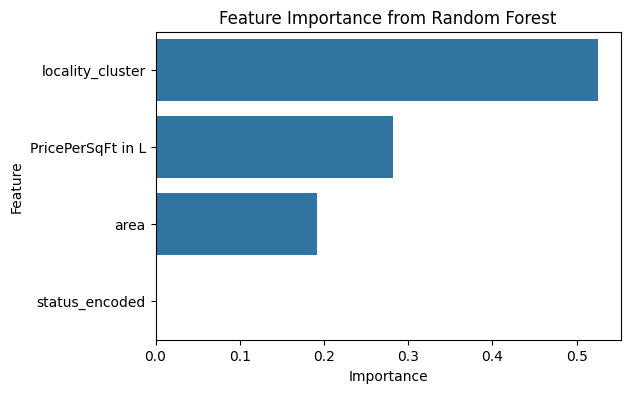

In [16]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Refined feature set
X = df[['area', 'locality_cluster', 'PricePerSqFt in L', 'status_encoded']]
# X = df[['area', 'locality_cluster', 'PricePerSqFt in L', 'area_x_PricePerSqFt']]
y = df['LogPrice']

# Train the Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Extract feature importances
importances = rf.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(6,4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance from Random Forest')
plt.show()


In [17]:
df.drop("status_encoded",axis=1,inplace=True)
df

,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_cluster,PricePerSqFt in L,area_x_PricePerSqFt
0,Lak And Hanware The Residency Tower,-0.506566,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,0,0.364964,250.00
1,Radheya Sai Enclave Building No 2,-0.573703,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,0,0.082047,52.51
2,Romell Serene,-0.618461,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,2,0.283607,173.00
3,Soundlines Codename Urban Rainforest,-0.221607,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,0,0.068470,59.98
4,Origin Oriana,-0.545356,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,0,0.142807,94.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,Parinee Liva Roca,0.749641,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,1,0.458415,700.00
76034,Parinee Liva Roca,3.020362,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,1,0.393572,1200.00
76035,Lodha Seaview,3.414232,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,4,0.301841,1000.00
76036,Hubtown Serene,0.418432,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,2,0.325670,425.00


# 4.3Code for Model Performance Evaluation
After training the Random Forest model with our updated features, use the following code to evaluate its performance:

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Making predictions on the training data (X)
y_pred = rf.predict(X)

# Calculate Performance Metrics
mae = mean_absolute_error(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.0010097128377240657
Root Mean Squared Error (RMSE): 0.005721885883283889
R² Score: 0.9999538644446032


# Phase 5: Model Building 
4.1 Split the Dataset:
Split the dataset into training and testing sets (e.g., 80% training, 20% testing) using train_test_split.

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the Random Forest model on the training set
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Making predictions on the test set
y_pred_test = rf.predict(X_test)

# Evaluate the model on the test set
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
r2_test = r2_score(y_test, y_pred_test)

print(f"Test MAE: {mae_test}")
print(f"Test RMSE: {rmse_test}")
print(f"Test R² Score: {r2_test}")


Test MAE: 0.0028052906343494304
Test RMSE: 0.012446068538383148
Test R² Score: 0.9997807189445485


#  Cross-Validation
Next, we can use cross-validation to assess the stability and robustness of the model across different data splits. It helps avoid overfitting and gives a better estimate of the model's generalization.

In [20]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the average and standard deviation of the cross-validation scores
print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean CV R² Score: {np.mean(cv_scores)}")
print(f"Standard Deviation of CV R² Scores: {np.std(cv_scores)}")

Cross-Validation R² Scores: [0.9997778  0.99974781 0.99971873 0.99978766 0.99835317]
Mean CV R² Score: 0.9994770349980404
Standard Deviation of CV R² Scores: 0.0005624535600149789


# Phase 6 Hyperparameter Tuning (Using GridSearchCV or RandomizedSearchCV)
We can tune the hyperparameters of the Random Forest model to potentially improve its performance. The most commonly tuned parameters are:

In [21]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Further reduced hyperparameter ranges for faster search
param_distributions = {
    'n_estimators': [50, 100],  # Fewer estimators for faster search
    'max_depth': [10, 15],  # Limit max_depth to reduce complexity
    'min_samples_split': [2, 5],  # Keep a simple split range
    'min_samples_leaf': [1, 2],  # Minimal leaf nodes
    'bootstrap': [True]  # Keep one bootstrap option for simplicity
}

# Initialize the Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search with reduced iterations and folds for faster execution
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,  # Fewer iterations for faster execution
    cv=2,  # 2-fold cross-validation for faster search
    verbose=3,  # Keep verbose to track progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters from the search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Re-train the model with the best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Test the model on the test set
y_pred_best = rf_best.predict(X_test)

# Evaluate the model with the optimized hyperparameters
mae_best = mean_absolute_error(y_test, y_pred_best)
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
r2_best = r2_score(y_test, y_pred_best)

print(f"Tuned Test MAE: {mae_best}")
print(f"Tuned Test RMSE: {rmse_best}")
print(f"Tuned Test R² Score: {r2_best}")


Fitting 2 folds for each of 10 candidates, totalling 20 fits
Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15, 'bootstrap': True}
Tuned Test MAE: 0.003432760438353469
Tuned Test RMSE: 0.012717067385402835
Tuned Test R² Score: 0.9997710657970295


In [1]:
# import joblib

# # Save the trained model to the 'model' folder
# joblib.dump(rf_best, '../Model/house_price_model.pkl')

In [22]:
X = df[[ 'area', 'locality_cluster', 'PricePerSqFt in L', 'area_x_PricePerSqFt']]
df

,locality,area,region,status,age,PRICE in L,LogPrice,type_Apartment,type_Independent House,type_Penthouse,type_Studio Apartment,type_Villa,locality_cluster,PricePerSqFt in L,area_x_PricePerSqFt
0,Lak And Hanware The Residency Tower,-0.506566,Andheri West,Ready to move,New,250.00,5.521461,True,False,False,False,False,0,0.364964,250.00
1,Radheya Sai Enclave Building No 2,-0.573703,Naigaon East,Under Construction,New,52.51,3.961004,True,False,False,False,False,0,0.082047,52.51
2,Romell Serene,-0.618461,Borivali West,Under Construction,New,173.00,5.153292,True,False,False,False,False,2,0.283607,173.00
3,Soundlines Codename Urban Rainforest,-0.221607,Panvel,Under Construction,New,59.98,4.094011,True,False,False,False,False,0,0.068470,59.98
4,Origin Oriana,-0.545356,Mira Road East,Under Construction,New,94.11,4.544464,True,False,False,False,False,0,0.142807,94.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76033,Parinee Liva Roca,0.749641,Juhu,Ready to move,Unknown,700.00,6.551080,True,False,False,False,False,1,0.458415,700.00
76034,Parinee Liva Roca,3.020362,Juhu,Ready to move,Unknown,1200.00,7.090077,True,False,False,False,False,1,0.393572,1200.00
76035,Lodha Seaview,3.414232,Napeansea Road,Ready to move,Unknown,1000.00,6.907755,True,False,False,False,False,4,0.301841,1000.00
76036,Hubtown Serene,0.418432,Bandra East,Ready to move,Unknown,425.00,6.052089,True,False,False,False,False,2,0.325670,425.00


In [23]:
import shap
import pandas as pd

# Assuming 'rf_best' is the trained RandomForest model
explainer = shap.TreeExplainer(rf_best)

# Subset the data for faster computation (10,000 rows)
X_sample = X.sample(n=10000, random_state=42)

# Compute SHAP values for the sample
shap_values_sample = explainer.shap_values(X_sample)

# Check the shape of shap_values
print(f"Shape of shap_values for the sample: {shap_values_sample.shape}")

Shape of shap_values for the sample: (10000, 4)


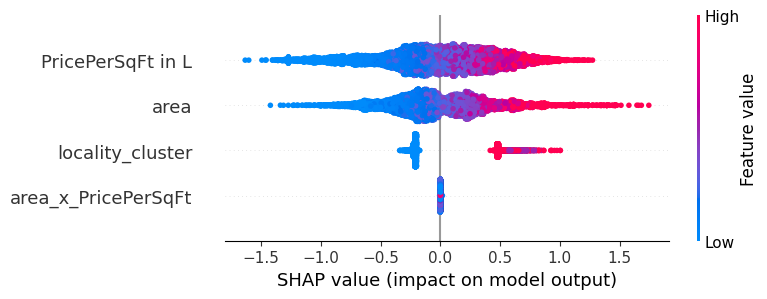

In [24]:
# SHAP summary plot for the sample data
shap.summary_plot(shap_values_sample, X_sample, plot_type="dot")

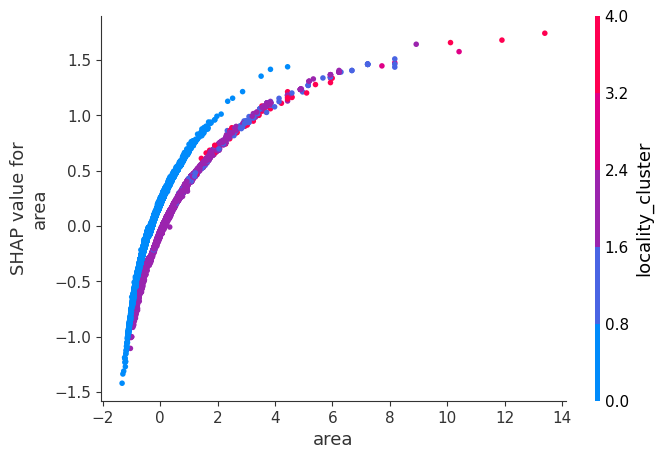

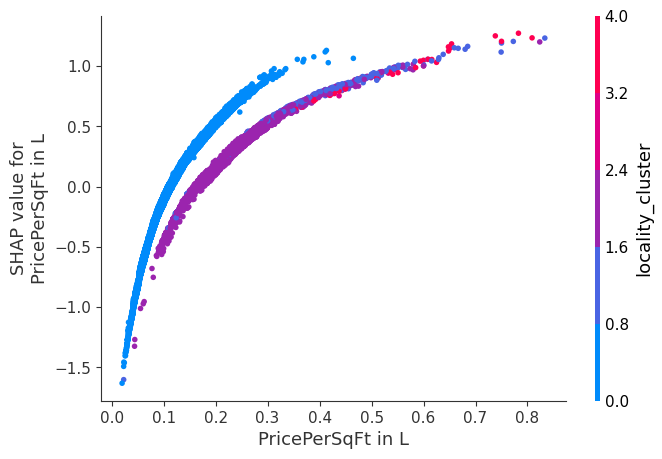

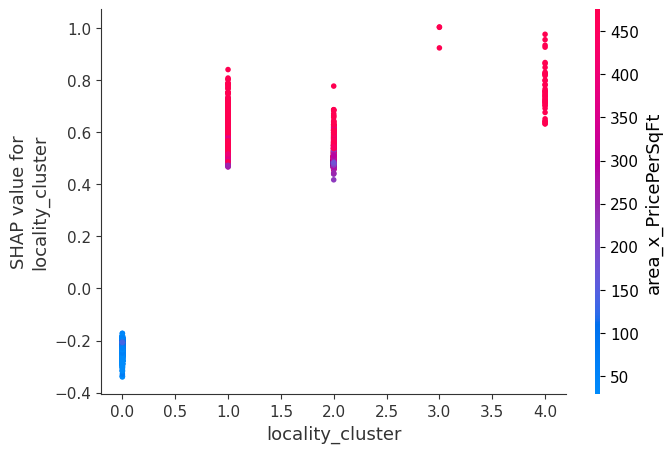

In [25]:
# SHAP dependence plot for 'area'
shap.dependence_plot("area", shap_values_sample, X_sample)

# SHAP dependence plot for 'PricePerSqFt in L'
shap.dependence_plot("PricePerSqFt in L", shap_values_sample, X_sample)

# SHAP dependence plot for 'locality_cluster'
shap.dependence_plot("locality_cluster", shap_values_sample, X_sample)

100%|===================| 9987/10000 [05:23<00:00]        

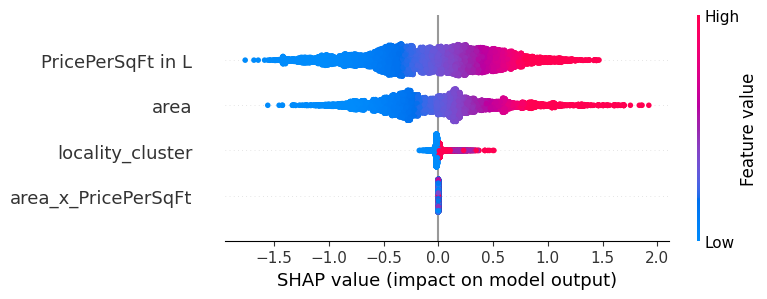

In [26]:
import shap

# Create the SHAP explainer using "interventional" method
explainer_fast = shap.TreeExplainer(rf_best, X, feature_perturbation="interventional")

# Compute SHAP values on the sample of the data (10,000 rows)
shap_values_fast = explainer_fast.shap_values(X_sample)

# SHAP summary plot for the fast computed values
shap.summary_plot(shap_values_fast, X_sample, plot_type="dot")

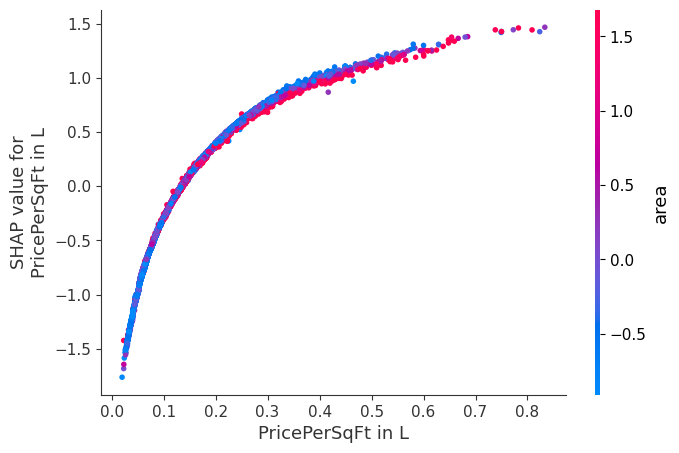

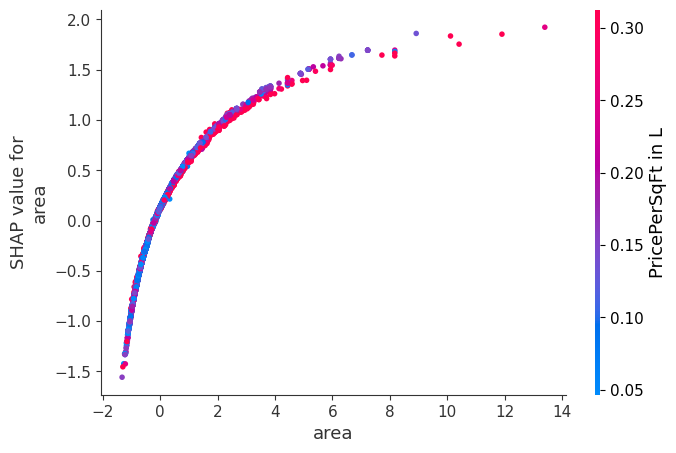

In [27]:
# SHAP dependence plot for 'PricePerSqFt in L'
shap.dependence_plot('PricePerSqFt in L', shap_values_fast, X_sample)

# SHAP dependence plot for 'area'
shap.dependence_plot('area', shap_values_fast, X_sample)


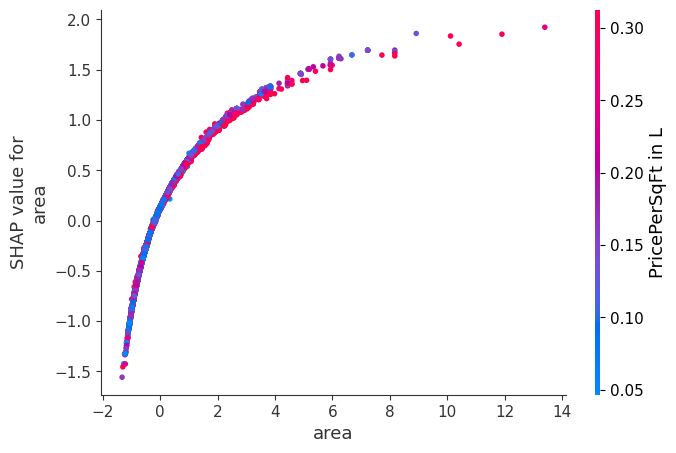

In [28]:
# Dependence plot for 'area' colored by 'PricePerSqFt in L'
shap.dependence_plot('area', shap_values_fast, X_sample, interaction_index='PricePerSqFt in L')

In [29]:
import shap

# Initialize the JS visualization in the notebook
shap.initjs()

# Now generate the force plot
shap.force_plot(explainer_fast.expected_value, shap_values_fast[0], X_sample.iloc[0])

In [30]:
# SHAP force plot for multiple predictions
shap.force_plot(explainer_fast.expected_value, shap_values_fast[:100], X.iloc[:100])

In [36]:
# Load the model
loaded_model = joblib.load('../Model/house_price_model.pkl')

In [40]:
import pandas as pd
import joblib

# Load the trained model
loaded_model = joblib.load('../Model/house_price_model.pkl')

def predict_price(locality, area, region, status, age, price_in_L, log_price, 
                  type_apartment, type_independent_house, type_penthouse, 
                  type_studio_apartment, type_villa, locality_cluster, 
                  price_per_sqft, area_x_price_per_sqft):
    
    # Prepare the input data according to the features used in the model
    input_data = {
        'locality': [locality],
        'area': [area],
        'region': [region],
        'status': [status],
        'age': [age],
        'PRICE in L': [price_in_L],
        'LogPrice': [log_price],
        'type_Apartment': [type_apartment],
        'type_Independent House': [type_independent_house],
        'type_Penthouse': [type_penthouse],
        'type_Studio Apartment': [type_studio_apartment],
        'type_Villa': [type_villa],
        'locality_cluster': [locality_cluster],
        'PricePerSqFt in L': [price_per_sqft],
        'area_x_PricePerSqFt': [area_x_price_per_sqft]
    }
    
    # Convert input data to a DataFrame
    input_df = pd.DataFrame(input_data)
    
    # Make the prediction
    predicted_price = loaded_model.predict(input_df)
    
    return predicted_price[0]

# Example usage
predicted = predict_price('Locality1', 1500, 'Region1', 'Status1', 10, 30, 4, 1, 0, 0, 0, 0, 0, 10, 15)
print(f'Predicted Price: {predicted}')


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- LogPrice
- PRICE in L
- age
- area_x_PricePerSqFt
- locality
- ...
Feature names seen at fit time, yet now missing:
- status_encoded
